In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [149]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen', 'Ips',
       'PPI', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_name', 'os'],
      dtype='object')

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head() 

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [4]:
df.shape

(1303, 12)

In [5]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# To find if any two rows have the same data  
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Unnamed: 0'] , inplace= True)

In [8]:
#change the RAM and WEIGHT columns by replacing the string values in it with a space 

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [9]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu Ram               Memory  \
0        Intel Core i5 2.3GHz   8            128GB SSD   
1        Intel Core i5 1.8GHz   8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8            256GB SSD   
3        Intel Core i7 2.7GHz  16            512GB SSD   
4        Intel Core i5 3.1GHz   8            256GB SSD   

                            Gpu  OpSys Weight        Price  
0  Intel Iris Plus Graphics 640  macOS   1.37   71378.6832  
1        Intel HD Graphics 6000  macOS   1.34   47895.5232  
2         Intel HD Graphics 620  No OS   1.86   30636.0000  
3            AMD Radeon Pro 455  macOS   1.83  135195.3360  
4  Intel Iris Plus Graphics 650  macOS   1.37   96095.8080

In [10]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


<AxesSubplot:xlabel='Price', ylabel='Density'>

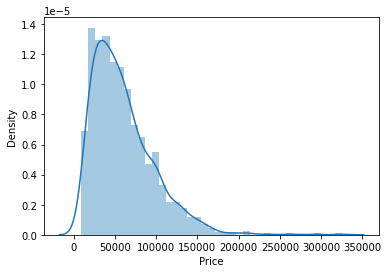

In [12]:
sns.distplot(df['Price'])

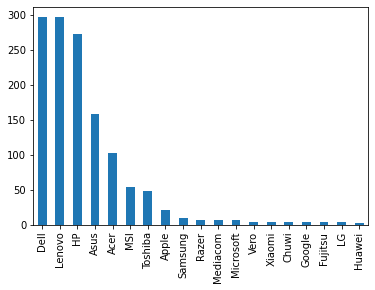

In [13]:
df['Company'].value_counts().plot(kind='bar') ;

In [14]:
plt.figure(figsize=(18,6))
#order parameter has to be used in order for the bars to be descending mode as this ordering functionality is not present in seaborn
sns.countplot(df['Company'], order = df['Company'].value_counts().index);
plt.xticks(rotation = 90);

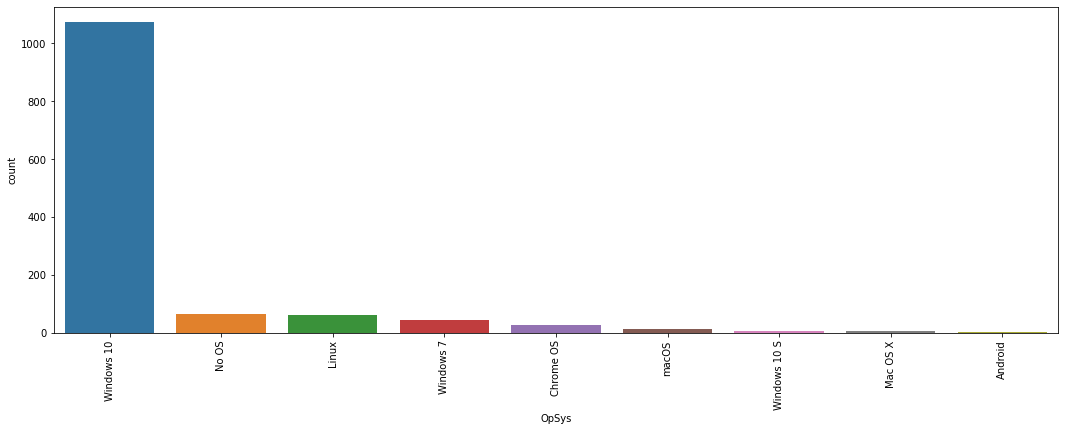

In [15]:
plt.figure(figsize=(18,6))
#order parameter has to be used in order for the bars to be descending mode as this ordering functionality is not present in seaborn
sns.countplot(df['OpSys'], order = df['OpSys'].value_counts().index);
plt.xticks(rotation = 90);

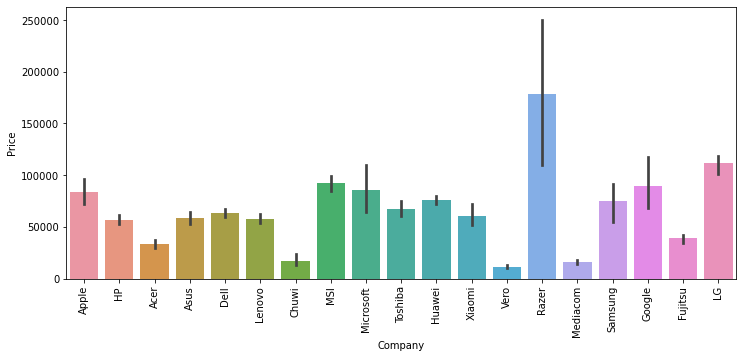

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['Company'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

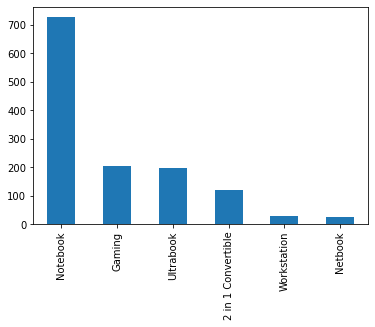

In [17]:
df['TypeName'].value_counts().plot(kind='bar');

In [18]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['TypeName'] , y = df['Price'])
plt.xticks(rotation = 90)
plt.show()

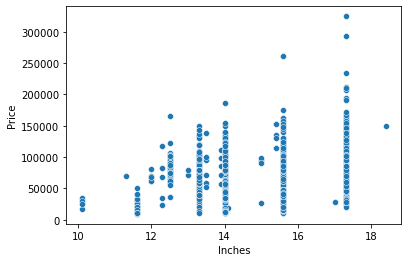

In [19]:
sns.scatterplot(df['Inches'] , df['Price']);

In [20]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

In [21]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [22]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0  
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0  
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0  
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0  
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0

In [23]:
df.sample(5)

Company   TypeName  Inches             ScreenResolution  \
746  Samsung  Ultrabook    13.3            Full HD 1920x1080   
691   Lenovo   Notebook    14.0            Full HD 1920x1080   
694  Toshiba   Notebook    13.3  IPS Panel Full HD 1920x1080   
790     Asus     Gaming    15.6            Full HD 1920x1080   
778    Razer     Gaming    14.0            Full HD 1920x1080   

                             Cpu  Ram                Memory  \
746   Intel Core i7 7500U 2.7GHz   16             256GB SSD   
691   Intel Core i5 7200U 2.5GHz    4             256GB SSD   
694   Intel Core i5 7200U 2.5GHz    8             256GB SSD   
790  Intel Core i7 7700HQ 2.8GHz    8  128GB SSD +  1TB HDD   
778  Intel Core i7 7700HQ 2.8GHz   16             512GB SSD   

                         Gpu       OpSys  Weight      Price  Touchscreen  
746    Intel HD Graphics 620  Windows 10    0.81   87858.72            0  
691    Intel HD Graphics 620  Windows 10    1.70   37242.72            0  
694    Intel HD Graphics 620  Windows 10    1.50   51841.44            0  
790   Nvidia GeForce GTX1060  Windows 10    2.24   71341.92            0  
778  Nvidia GeForce GTX 1060  Windows 10    1.95  154458.72            0

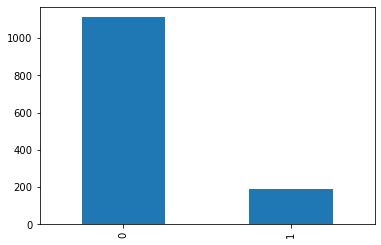

In [24]:
df['Touchscreen'].value_counts().plot(kind='bar');

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

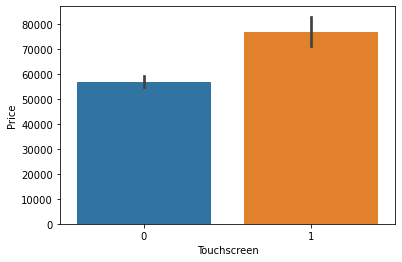

In [25]:
sns.barplot(df['Touchscreen'] , df['Price'])

In [26]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

<AxesSubplot:>

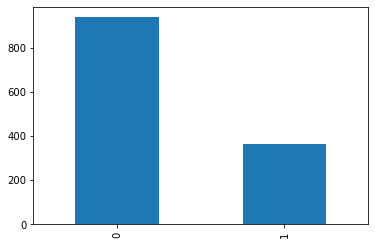

In [27]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price'>

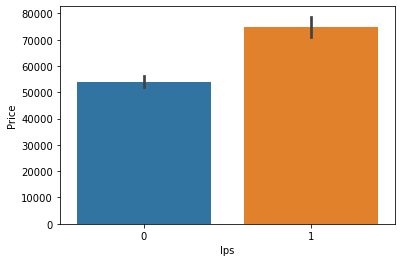

In [28]:
sns.barplot(df['Ips'] , df['Price'])

In [29]:
df['resolution rate'] = df['ScreenResolution'].apply(lambda x:x.split(' ')[-1])

In [30]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  resolution rate  
0       2560x1600  
1        1440x900  
2       1920x1080  
3       2880x1800  
4       2560x1600

In [31]:
df.sample(5)

Company            TypeName  Inches  \
1183    Acer            Notebook    15.6   
398     Dell         Workstation    15.6   
240   Lenovo            Notebook    15.6   
126       HP            Notebook    14.0   
638   Lenovo  2 in 1 Convertible    13.3   

                               ScreenResolution  \
1183                                   1366x768   
398         4K Ultra HD / Touchscreen 3840x2160   
240                                    1366x768   
126                           Full HD 1920x1080   
638   IPS Panel Full HD / Touchscreen 1920x1080   

                                     Cpu  Ram     Memory  \
1183  Intel Celeron Dual Core N3350 2GHz    4  500GB HDD   
398          Intel Core i7 7700HQ 2.8GHz    8  256GB SSD   
240             Intel Core i3 6006U 2GHz    8  128GB SSD   
126           Intel Core i5 8250U 1.6GHz    8    1TB HDD   
638           Intel Core i7 7500U 2.7GHz    8  256GB SSD   

                         Gpu       OpSys  Weight        Price  Touchscreen  \
1183   Intel HD Graphics 500  Windows 10    2.10   17742.2400            0   
398      Nvidia Quadro M1200  Windows 10    1.78  144495.3600            1   
240    Intel HD Graphics 520  Windows 10    2.20   31381.9200            0   
126   Intel UHD Graphics 620  Windows 10    1.63   43263.3600            0   
638    Intel HD Graphics 620  Windows 10    1.37   93635.3376            1   

      Ips resolution rate  
1183    0        1366x768  
398     0       3840x2160  
240     0        1366x768  
126     0       1920x1080  
638     1       1920x1080

In [32]:
df['X_resolution'] = df['resolution rate'].apply(lambda x:x.split('x')[0])
df['Y_resolution'] = df['resolution rate'].apply(lambda x:x.split('x')[1])


In [33]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  resolution rate X_resolution Y_resolution  
0       2560x1600         2560         1600  
1        1440x900         1440          900  
2       1920x1080         1920         1080  
3       2880x1800         2880         1800  
4       2560x1600         2560         1600

In [34]:
df.drop('resolution rate' , axis = 1 , inplace= True)

In [35]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

  X_resolution Y_resolution  
0         2560         1600  
1         1440          900  
2         1920         1080  
3         2880         1800  
4         2560         1600

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_resolution      1303 non-null   object 
 14  Y_resolution      1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 142.6+ KB


In [37]:
df['X_resolution'] = df['X_resolution'].astype('int')
df['Y_resolution'] =df['Y_resolution'].astype('int');


In [38]:
df.corr()['Price'] #shows the percentage on how other variables are correlated with the output variable Price

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
Name: Price, dtype: float64

In [39]:
df['PPI'] = (np.sqrt(df['X_resolution'] **2 + df['Y_resolution']**2)/df['Inches']).astype('float')

Here even though we have strong correlation between X_resolution , Y_resolution with price we are not going to use that 
because of the problem with multi collinearity so we made a new column combining all the three columns used in the above
code cell with the some formula

In [40]:

df.corr()['Price']

Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
Ips             0.252208
X_resolution    0.556529
Y_resolution    0.552809
PPI             0.473487
Name: Price, dtype: float64

In [41]:
# Here we are dropping screen resolution , X , Y resoltuon and inches column too as we don't need those anymore
df.drop(columns=['ScreenResolution', 'X_resolution' , 'Y_resolution', 'Inches'] ,axis =1 , inplace= True)

In [42]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          PPI  
0  226.983005  
1  127.677940  
2  141.211998  
3  220.534624  
4  226.983005

In [43]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
AMD E-Series 6110 1.5GHz           1
Intel Core M 7Y30 1.0GHz           1
Intel Xeon E3-1535M v5 2.9GHz      1
Intel Core i5 1.3GHz               1
Intel Core M M3-6Y30 0.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [44]:
df['Cpu_name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [45]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          PPI       Cpu_name  
0  226.983005  Intel Core i5  
1  127.677940  Intel Core i5  
2  141.211998  Intel Core i5  
3  220.534624  Intel Core i7  
4  226.983005  Intel Core i5

In [46]:
def fetch_preprocessor(text):
    if text =='Intel Core i5' or text =='Intel Core i7' or text =='Intel Core i3':
        return text
    else :
        if text.split()[0] == 'Intel':
            return 'other Intel Processor'
        else:
            return 'AMD processor'

In [47]:
df['Cpu_brand'] = df['Cpu_name'].apply(fetch_preprocessor)

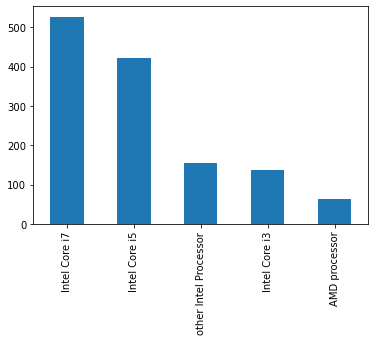

In [48]:
df['Cpu_brand'].value_counts().plot(kind='bar');

In [49]:
plt.figure(figsize=(8,4))
sns.barplot(df['Cpu_brand'] , df['Price'])

<AxesSubplot:xlabel='Cpu_brand', ylabel='Price'>

In [50]:
df.head()

Company   TypeName                         Cpu  Ram               Memory  \
0   Apple  Ultrabook        Intel Core i5 2.3GHz    8            128GB SSD   
1   Apple  Ultrabook        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2      HP   Notebook  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3   Apple  Ultrabook        Intel Core i7 2.7GHz   16            512GB SSD   
4   Apple  Ultrabook        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight        Price  Touchscreen  Ips  \
0  Intel Iris Plus Graphics 640  macOS    1.37   71378.6832            0    1   
1        Intel HD Graphics 6000  macOS    1.34   47895.5232            0    0   
2         Intel HD Graphics 620  No OS    1.86   30636.0000            0    0   
3            AMD Radeon Pro 455  macOS    1.83  135195.3360            0    1   
4  Intel Iris Plus Graphics 650  macOS    1.37   96095.8080            0    1   

          PPI       Cpu_name      Cpu_brand  
0  226.983005  Intel Core i5  Intel Core i5  
1  127.677940  Intel Core i5  Intel Core i5  
2  141.211998  Intel Core i5  Intel Core i5  
3  220.534624  Intel Core i7  Intel Core i7  
4  226.983005  Intel Core i5  Intel Core i5

In [51]:
df.drop(columns=['Cpu','Cpu_name'] , inplace=True)

In [52]:
df.head()

Company   TypeName  Ram               Memory                           Gpu  \
0   Apple  Ultrabook    8            128GB SSD  Intel Iris Plus Graphics 640   
1   Apple  Ultrabook    8  128GB Flash Storage        Intel HD Graphics 6000   
2      HP   Notebook    8            256GB SSD         Intel HD Graphics 620   
3   Apple  Ultrabook   16            512GB SSD            AMD Radeon Pro 455   
4   Apple  Ultrabook    8            256GB SSD  Intel Iris Plus Graphics 650   

   OpSys  Weight        Price  Touchscreen  Ips         PPI      Cpu_brand  
0  macOS    1.37   71378.6832            0    1  226.983005  Intel Core i5  
1  macOS    1.34   47895.5232            0    0  127.677940  Intel Core i5  
2  No OS    1.86   30636.0000            0    0  141.211998  Intel Core i5  
3  macOS    1.83  135195.3360            0    1  220.534624  Intel Core i7  
4  macOS    1.37   96095.8080            0    1  226.983005  Intel Core i5

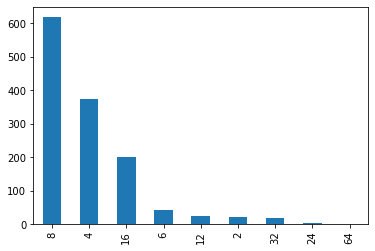

In [53]:
df['Ram'].value_counts().plot(kind='bar');

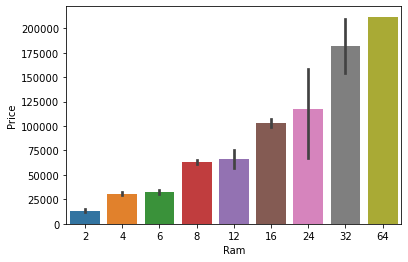

In [54]:
sns.barplot(df['Ram'],df['Price'])
plt.show()

In [55]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
508GB Hybrid                       1
1

In [56]:
#This removes the .0 decimal from the memory string values and replace it with ''
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [57]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [58]:
df["first"]= new[0]

In [59]:
df["first"]=df["first"].str.strip() #strip will remove the spaces if present at the end and the start of the string

In [60]:
df["second"]= new[1]

In [61]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [62]:
df['first'] = df['first'].str.replace(r'\D', '')

In [63]:
df["second"].fillna("0", inplace = True)

In [64]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [65]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [66]:
df.sample(5)

Company   TypeName  Ram               Memory                      Gpu  \
105       HP   Notebook    6              256 SSD     Nvidia GeForce 940MX   
488   Lenovo  Ultrabook   16              512 SSD    Intel HD Graphics 620   
785      MSI     Gaming   16  256 SSD +  1000 HDD  Nvidia GeForce GTX 1060   
889   Lenovo   Notebook    4              500 HDD            AMD Radeon R3   
1093    Dell  Ultrabook    4              256 SSD           AMD Radeon 530   

           OpSys  Weight       Price  Touchscreen  Ips         PPI  \
105   Windows 10    1.58   35111.520            0    1  157.350512   
488   Windows 10    1.36   95797.440            0    1  176.232574   
785   Windows 10    1.60  100752.480            0    1  157.350512   
889   Windows 10    2.80   20193.120            0    0  106.113062   
1093  Windows 10    1.40   43601.688            0    1  165.632118   

          Cpu_brand   HDD  SSD  Hybrid  Flash_Storage  
105   Intel Core i5     0  256       0              0  
488   Intel Core i7     0  512       0              0  
785   Intel Core i7  1000  256       0              0  
889   AMD processor   500    0       0              0  
1093  Intel Core i5     0  256       0              0

In [67]:
df.drop(columns=['Memory'] , inplace = True)

In [68]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [70]:
df.drop(columns=['Hybrid' , 'Flash_Storage'] , inplace= True)

In [72]:
df['Gpu_name'] = df['Gpu'].apply(lambda x:x.split()[0])

In [76]:
df.sample(5)

Company  TypeName  Ram                      Gpu       OpSys  Weight  \
196    Razer    Gaming   32  Nvidia GeForce GTX 1080  Windows 10    3.49   
1111    Dell  Notebook    4       AMD Radeon R5 M315   Windows 7    2.24   
901     Asus    Gaming   32  Nvidia GeForce GTX 980M  Windows 10    3.58   
758     Dell    Gaming   16  Nvidia GeForce GTX 1070  Windows 10    4.42   
1097     MSI    Gaming    8  Nvidia GeForce GTX 965M  Windows 10    2.60   

            Price  Touchscreen  Ips         PPI      Cpu_brand   HDD   SSD  \
196   324954.7200            1    0  254.671349  Intel Core i7     0  1000   
1111   40980.3120            0    0  100.454670  Intel Core i5   500     0   
901    68145.1200            0    1  127.335675  Intel Core i7     0   512   
758   152859.7872            0    1  282.423996  Intel Core i7  1000   256   
1097   85194.7200            0    0  127.335675  Intel Core i7     0   256   

     Gpu_name  
196    Nvidia  
1111      AMD  
901    Nvidia  
758    Nvidia  
1097   Nvidia

In [77]:
df['Gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_name, dtype: int64

In [78]:
#here we are removing the ARM based processor laptop because we have only one sample and it will be of no use in prediction
df = df[df['Gpu_name'] != 'ARM']

In [79]:
df['Gpu_name'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_name, dtype: int64

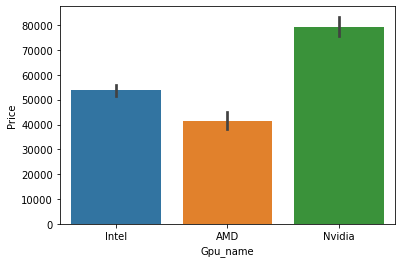

In [80]:
sns.barplot(df['Gpu_name'] ,df['Price'])
plt.show()

In [81]:
df.drop('Gpu' , axis =1 , inplace=True)

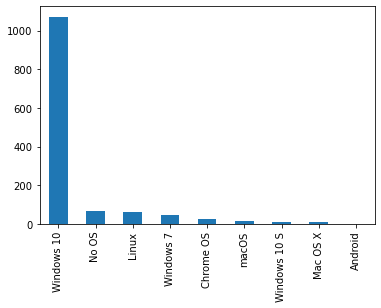

In [83]:
df['OpSys'].value_counts().plot(kind='bar');

In [95]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [96]:
df['os'] = df['OpSys'].apply(cat_os)

In [97]:
df.head()

Company   TypeName  Ram  OpSys  Weight        Price  Touchscreen  Ips  \
0   Apple  Ultrabook    8  macOS    1.37   71378.6832            0    1   
1   Apple  Ultrabook    8  macOS    1.34   47895.5232            0    0   
2      HP   Notebook    8  No OS    1.86   30636.0000            0    0   
3   Apple  Ultrabook   16  macOS    1.83  135195.3360            0    1   
4   Apple  Ultrabook    8  macOS    1.37   96095.8080            0    1   

          PPI      Cpu_brand  HDD  SSD Gpu_name                  os  
0  226.983005  Intel Core i5    0  128    Intel                 Mac  
1  127.677940  Intel Core i5    0    0    Intel                 Mac  
2  141.211998  Intel Core i5    0  256    Intel  Others/No OS/Linux  
3  220.534624  Intel Core i7    0  512      AMD                 Mac  
4  226.983005  Intel Core i5    0  256    Intel                 Mac

In [98]:
df.drop(columns=['OpSys'] , inplace = True)

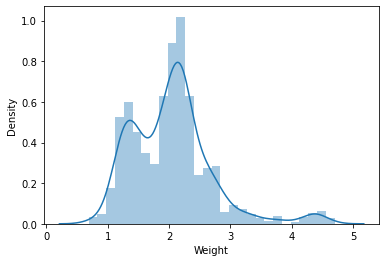

In [100]:
sns.distplot(df['Weight']);

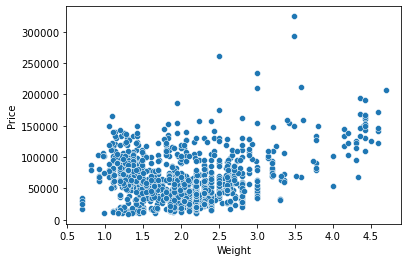

In [102]:
sns.scatterplot(df['Weight'], df['Price']);

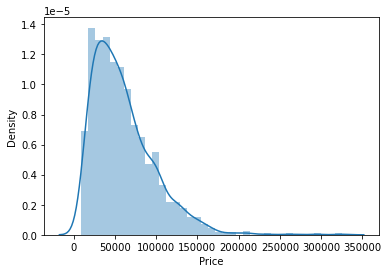

In [103]:
sns.distplot(df['Price']);

we are going to take a log transformation of the data here because since the data is skewed we might get some problem with the
machine learning models . Hence we will take log transformation of the PRICE column

In [106]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [107]:
X

Company            TypeName  Ram  Weight  Touchscreen  Ips         PPI  \
0      Apple           Ultrabook    8    1.37            0    1  226.983005   
1      Apple           Ultrabook    8    1.34            0    0  127.677940   
2         HP            Notebook    8    1.86            0    0  141.211998   
3      Apple           Ultrabook   16    1.83            0    1  220.534624   
4      Apple           Ultrabook    8    1.37            0    1  226.983005   
...      ...                 ...  ...     ...          ...  ...         ...   
1298  Lenovo  2 in 1 Convertible    4    1.80            1    1  157.350512   
1299  Lenovo  2 in 1 Convertible   16    1.30            1    1  276.053530   
1300  Lenovo            Notebook    2    1.50            0    0  111.935204   
1301      HP            Notebook    6    2.19            0    0  100.454670   
1302    Asus            Notebook    4    2.20            0    0  100.454670   

                  Cpu_brand   HDD  SSD Gpu_name                  os  
0             Intel Core i5     0  128    Intel                 Mac  
1             Intel Core i5     0    0    Intel                 Mac  
2             Intel Core i5     0  256    Intel  Others/No OS/Linux  
3             Intel Core i7     0  512      AMD                 Mac  
4             Intel Core i5     0  256    Intel                 Mac  
...                     ...   ...  ...      ...                 ...  
1298          Intel Core i7     0  128    Intel             Windows  
1299          Intel Core i7     0  512    Intel             Windows  
1300  other Intel Processor     0    0    Intel             Windows  
1301          Intel Core i7  1000    0      AMD             Windows  
1302  other Intel Processor   500    0    Intel             Windows  

[1302 rows x 12 columns]

In [108]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.15 , random_state=2)

In [111]:
X_train

Company            TypeName  Ram  Weight  Touchscreen  Ips         PPI  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu_brand   HDD  SSD Gpu_name                  os  
183           Intel Core i5     0  128    Intel             Windows  
1141          Intel Core i7  1000  128   Nvidia             Windows  
1049  other Intel Processor     0    0    Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0    Intel             Windows  
878           Intel Core i5  1000  128   Nvidia             Windows  
...                     ...   ...  ...      ...                 ...  
466           Intel Core i3   500    0   Nvidia             Windows  
299           Intel Core i7     0  512   Nvidia             Windows  
493           AMD processor  1000    0      AMD             Windows  
527           Intel Core i3  2000    0   Nvidia  Others/No OS/Linux  
1193  other Intel Processor     0    0    Intel                 Mac  

[1106 rows x 12 columns]

In [130]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [121]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor , ExtraTreesRegressor , GradientBoostingRegressor , AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   Ips          1302 non-null   int64  
 7   PPI          1302 non-null   float64
 8   Cpu_brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu_name     1302 non-null   object 
 12  os           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 164.5+ KB


In [123]:
from sklearn.compose import make_column_selector

cat_column_selector = make_column_selector(dtype_include='object')
num_column_selector = make_column_selector(dtype_exclude='object')

cat_columns = cat_column_selector(df)
num_columns = num_column_selector(df)

In [126]:
cat_columns

['Company', 'TypeName', 'Cpu_brand', 'Gpu_name', 'os']

In [125]:
num_columns

['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'PPI', 'HDD', 'SSD']

# Linear Regression

In [132]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8073277448418732
MAE:  0.21017827976428824


In [133]:
np.exp(0.21)

1.2336780599567432

This above value 1.23 means that we are getting an error of around 1.23 rupees while predicting the laptops in the test set.
That is quite surprising too.

# Ridge Regression

In [134]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8127331031311809
MAE:  0.20926802242582965


# Lasso Regression

In [135]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8071853945317105
MAE:  0.21114361613472565


# KNN

In [136]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8021984604448553
MAE:  0.19319716721521116


# DecisionTree Regressor

In [137]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8489238037295451
MAE:  0.17818299994588113


# SVM

In [138]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = SVR(kernel='rbf', C = 10000 , epsilon=0.1)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8083180902257614
MAE:  0.20239059427481307


# Random Forest

In [151]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100 ,
                             random_state=3,
                             max_samples=0.5 ,
                             max_features=0.75 ,
                             max_depth=15)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8873402378382488
MAE:  0.15860130110457718


# Extra Trees

In [140]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100 ,
                             random_state=3,
                             max_samples=0.5 ,
                             max_features=0.75 ,
                             max_depth=15)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8753793123440623
MAE:  0.15979519126758127


# AdaBoost 

In [141]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = AdaBoostRegressor(learning_rate=1.0 , n_estimators=15)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.7940774714738681
MAE:  0.2311908038175172


# Gradient Boosting Regressor

In [142]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8820396941875176
MAE:  0.15974891033410768


# XGBoost

In [143]:
step1 = ColumnTransformer(transformers=[
    ('Cat_transformer' , OneHotEncoder(sparse=False , drop='first') , cat_columns)
], remainder='passthrough')

step2 = XGBRegressor(n_estimators = 45 , max_depth = 5 , learning_rate = 0.5)

pipe = Pipeline([('step1' , step1),
               ('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print("R2_Score: " , r2_score(y_test , y_pred))
print("MAE: " , mean_absolute_error(y_test , y_pred))

R2_Score:  0.8811773435850243
MAE:  0.16496203512600974


# Votting Regressor

In [144]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8903625732794254
MAE 0.1583380712779143


# Stacking Regressor

In [145]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8786794961878938
MAE 0.1680903355794606


## Exporting the model

In [152]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(pipe , open('pipe.pkl' , 'wb'))

In [153]:
df.head()

Company   TypeName  Ram  Weight        Price  Touchscreen  Ips         PPI  \
0   Apple  Ultrabook    8    1.37   71378.6832            0    1  226.983005   
1   Apple  Ultrabook    8    1.34   47895.5232            0    0  127.677940   
2      HP   Notebook    8    1.86   30636.0000            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  135195.3360            0    1  220.534624   
4   Apple  Ultrabook    8    1.37   96095.8080            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_name                  os  
0  Intel Core i5    0  128    Intel                 Mac  
1  Intel Core i5    0    0    Intel                 Mac  
2  Intel Core i5    0  256    Intel  Others/No OS/Linux  
3  Intel Core i7    0  512      AMD                 Mac  
4  Intel Core i5    0  256    Intel                 Mac

In [154]:
X_train

Company            TypeName  Ram  Weight  Touchscreen  Ips         PPI  \
183   Toshiba            Notebook    8    2.00            0    0  100.454670   
1141      MSI              Gaming    8    2.40            0    0  141.211998   
1049     Asus             Netbook    4    1.20            0    0  135.094211   
1020     Dell  2 in 1 Convertible    4    2.08            1    1  141.211998   
878      Dell            Notebook    4    2.18            0    0  141.211998   
...       ...                 ...  ...     ...          ...  ...         ...   
466      Acer            Notebook    4    2.20            0    0  100.454670   
299      Asus           Ultrabook   16    1.63            0    0  141.211998   
493      Acer            Notebook    8    2.20            0    0  100.454670   
527    Lenovo            Notebook    8    2.20            0    0  100.454670   
1193    Apple           Ultrabook    8    0.92            0    1  226.415547   

                  Cpu_brand   HDD  SSD Gpu_name                  os  
183           Intel Core i5     0  128    Intel             Windows  
1141          Intel Core i7  1000  128   Nvidia             Windows  
1049  other Intel Processor     0    0    Intel  Others/No OS/Linux  
1020          Intel Core i3  1000    0    Intel             Windows  
878           Intel Core i5  1000  128   Nvidia             Windows  
...                     ...   ...  ...      ...                 ...  
466           Intel Core i3   500    0   Nvidia             Windows  
299           Intel Core i7     0  512   Nvidia             Windows  
493           AMD processor  1000    0      AMD             Windows  
527           Intel Core i3  2000    0   Nvidia  Others/No OS/Linux  
1193  other Intel Processor     0    0    Intel                 Mac  

[1106 rows x 12 columns]

In [155]:
columns = X_train.columns

In [160]:
index = []
for name in cat_columns:
    cat_index = columns.get_loc(name)
    index.append(cat_index)

In [161]:
index

[0, 1, 7, 10, 11]